In [15]:
#load the tensorflow library


In [16]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
# add the helper libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
print (tf.__version__)

1.13.1


In [ ]:
#download the fashion mnnist dataset 
70000 greyscale 10 categories - low resolution 28 by 28 pixels images centre cropped and sequentially labelled 

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
((train_images,train_labels),(test_images,test_labels)) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step: 


In [7]:
#explore the size of the dataset and the length of the data

train_images.shape

(60000, 28, 28)

In [8]:
len(train_images)

60000

#the images have labels from 0 to 9
0 T-shirt / top
1 trouser
2 pullover
3 Dress
4 Coat
5 Sandal
6 shirt
7 sneaker
8 Bag
9 Ankle boot

In [9]:
# store these into a dictonary for plotting the images

class_names=['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [10]:
#check the train labels 
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Preprocess the taining and testing dataset --- this is important to inspect, the daataa is preprocessed already


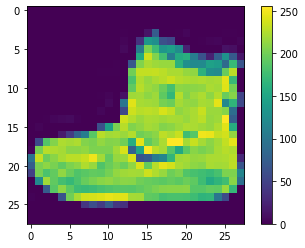

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [ ]:
# use feature scaling 

# before feeding to aneural network change the values between 0 and 1 [ make them float numbers]

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

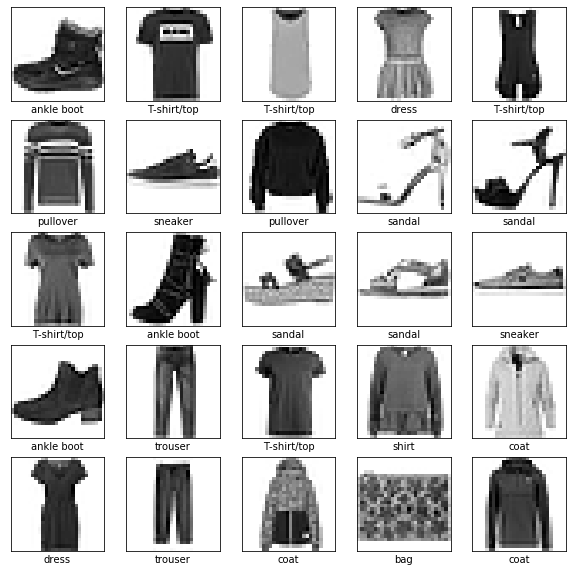

In [17]:
%matplotlib inline
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [ ]:
Build the model

In [19]:
# the model of the neural network contains flattening the 2d array to 1d 
# the flat array is fed into 128 neuron densely(fully) connected, neural layers \
# a ten node softmax layer ... rteturns 10 probability score that sum to 1

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
#compile and build the model

In [20]:
# the optimizer is the loss function 
# the metrics is the monitor for training and testing steps


model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [21]:
# train the model
model.fit(train_images, train_labels, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 17s 282us/sample - loss: 0.4977 - acc: 0.8250
Epoch 2/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.3752 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.3361 - acc: 0.8769
Epoch 4/5
60000/60000 [==============================] - 13s 218us/sample - loss: 0.3124 - acc: 0.8843
Epoch 5/5
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2930 - acc: 0.8918


In [22]:
# evaluate the accuracy
test_loss, test_acc=model.evaluate(test_images, test_labels)
print('test accuracy:',test_acc)

10000/10000 [==============================] - 1s 143us/sample - loss: 0.3464 - acc: 0.8788
test accuracy: 0.8788


In [24]:
# make predicttions using the learnt model over the test dataset
# confidence of the model that the images corresponds to the 10 different articles of clothing 
predictions=model.predict(test_images)
predictions[0]

array([2.1346518e-06, 7.9086215e-07, 2.1594931e-06, 4.7161168e-07,
       1.4517466e-06, 4.5039732e-02, 3.1620823e-06, 2.9020190e-02,
       6.4282358e-05, 9.2586559e-01], dtype=float32)

In [25]:
# we can see which label has the highest confidence value
np.argmax(predictions[0])

9

In [26]:
# check the predicted class name with the test labels
test_labels[0]

9

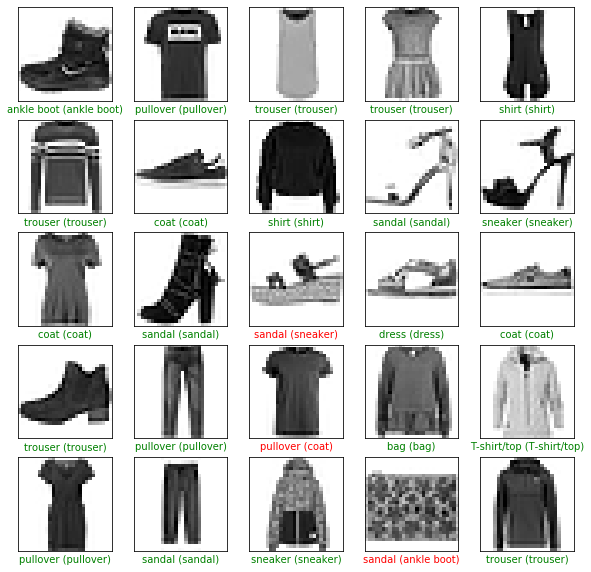

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    predicted_label=np.argmax(predictions[i])
    true_label= test_labels[i]
    if predicted_label == true_label:
        color='green'
    else:
        color='red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], class_names[true_label]),color=color)
